In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data= pd.read_csv("D:\ml_datasets\heart_failure_clinical_records_dataset.csv")
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [ ]:
x=data
y=x.pop('DEATH_EVENT')
print(x,y)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def tunning_adaboost(x,y):
    dt_clf=AdaBoostClassifier()
    scorer=make_scorer(roc_auc_score)
    parameters={'n_estimators':[10,40,70,120,150,180,200], 'learning_rate' : [0.5,0.8,1,1.2]}
    obj=GridSearchCV(dt_clf,parameters,scoring=scorer,cv=shuffle())
    obj=obj.fit(x,y)
    best_clf=obj.best_estimator_
    print(best_clf)
    return best_clf

In [ ]:
def tunning_tree(x,y):
    dt_clf=RandomForestClassifier()
    scorer=make_scorer(roc_auc_score)
    parameters={'n_estimators':[10,20,30,40,50,60,70,80,90,100],'criterion':['gini','entropy']}
    obj=GridSearchCV(dt_clf,parameters,scoring=scorer,cv=shuffle())
    obj=obj.fit(x,y)
    best_clf=obj.best_estimator_
    print(best_clf)
    return best_clf

In [ ]:
# evaluating our model
from sklearn.model_selection import learning_curve
def learning_graph(estimator,x,y):
    train_size,train_score,test_score=learning_curve(estimator,x,y,cv=shuffle(),train_sizes=np.linspace(0.1,1.0,10))
    train_scores_mean=np.mean(train_score,axis=1)
    test_scores_mean=np.mean(test_score,axis=0)
    plt.grid()
    plt.plot(train_scores_mean,'o-',color='g')
    plt.plot(test_scores_mean,'o-',color='r')
    plt.show()

In [ ]:
from sklearn.model_selection import ShuffleSplit
def shuffle(n_split=10,test_siz=0.2,random_stat=5):
    sset=ShuffleSplit(n_splits=n_split,test_size=test_siz,random_state=random_stat)
    return sset

In [ ]:
clf =tunning_tree(xtrain,ytrain)

RandomForestClassifier(n_estimators=60)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

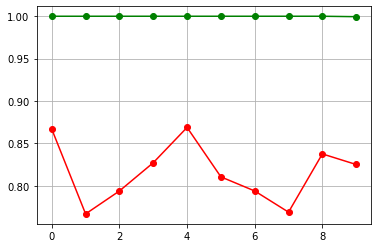

In [ ]:
learning_graph(clf,xtrain,ytrain)

In [ ]:
pred=clf.predict(xtest)

In [ ]:
from sklearn.metrics import roc_curve
def roc_c(ytest,prediction):
    fpr,tpr,threshold=roc_curve(ytest,prediction)
    plt.grid()
    plt.plot(fpr,tpr)
    plt.legend("roc curve")
    plt.show()
    
    

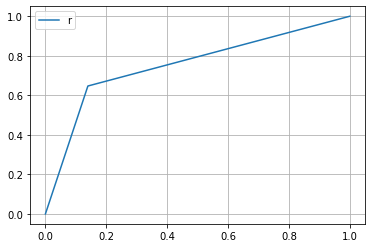

In [ ]:
roc_c(ytest,pred)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,pred))

[[37  6]
 [ 6 11]]


In [ ]:
clf1 =tunning_adaboost(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.5, n_estimators=40)


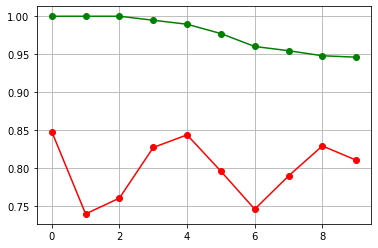

In [ ]:
learning_graph(clf1,xtrain,ytrain)

In [ ]:
pred1=clf1.predict(xtest)

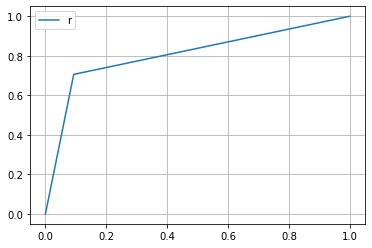

In [ ]:
roc_c(ytest,pred1)